In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

%load_ext autoreload
%autoreload 2

os.chdir('/content/drive/MyDrive/PR202010770/Lab07')

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [4]:
def unpackSIFTOctave(kpt):
    """unpackSIFTOctave(kpt)->(octave,layer,scale)
    @created by Silencer at 2018.01.23 11:12:30 CST
    @brief Unpack Sift Keypoint by Silencer
    @param kpt: cv2.KeyPoint (of SIFT)
    """
    _octave = kpt.octave
    octave = _octave & 0xFF
    layer = (_octave >> 8) & 0xFF
    if octave >= 128:
        octave |= -128
    if octave >= 0:
        scale = float(1 / (1 << octave))
    else:
        scale = float(1 << -octave)
    return octave, layer, scale

In [5]:
dirpath = 'image/'

## 이미지 읽고 Gray Scale로 변환
img1 = cv2.imread(dirpath + 'book1.png')
img2 = cv2.imread(dirpath + 'book2.png')

grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# grayimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

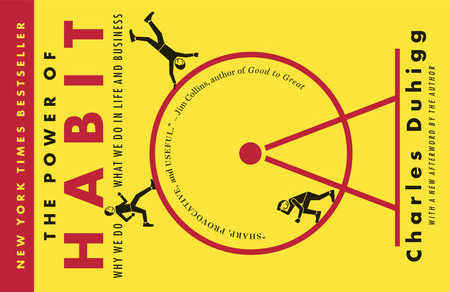

In [6]:
## img2에 rotation을 적용 후 Gray Scale 변환

height = img2.shape[0]
width = img2.shape[1]

d90 = 90.0 * np.pi / 180

# 동차 행렬을 이용한 기하 변환

M1 = np.array([[np.cos(d90), np.sin(d90), 0], ## 90도 회전
               [-1* np.sin(d90), np.cos(d90), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, 0],
               [0, 1, width-1],
               [0, 0, 1]], dtype=np.float32)

my_M = np.matmul( M2, M1) ## 회전(M1) 먼저 하고 이동 (M2)
my_M = my_M[0:2, :]  ## 함수에 입력으로 들어가도록 크기 맞추기

img2_rotation = cv2.warpAffine(img2, my_M, (height, width))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(img2_rotation)

grayimg2_rotation = cv2.cvtColor(img2_rotation, cv2.COLOR_BGR2GRAY)

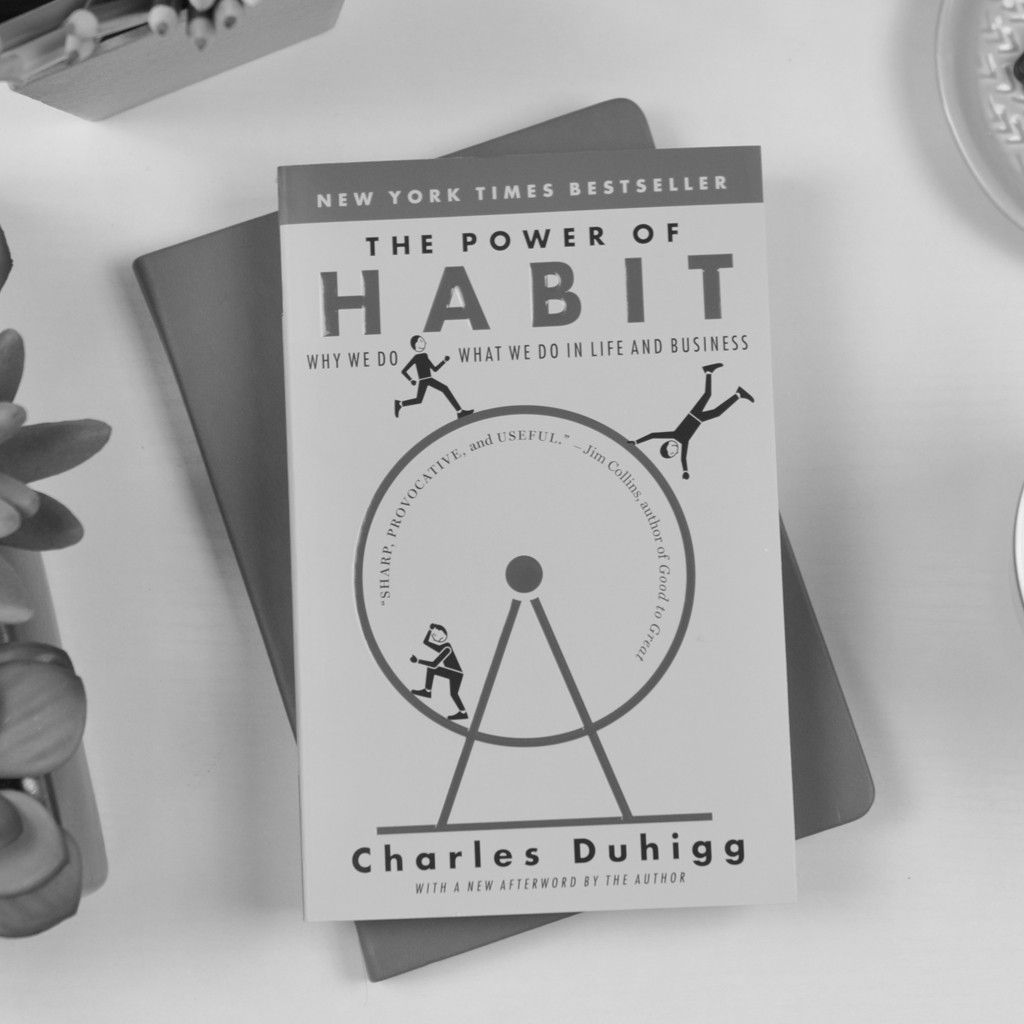

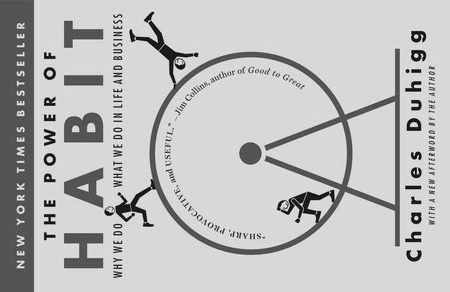

In [7]:
cv2_imshow(grayimg1)
# cv2_imshow(grayimg2)
cv2_imshow(grayimg2_rotation)

In [8]:
## SIFT
sift = cv2.SIFT_create()

## keypoints와 descriptor 저장
keypoints1, descriptor1 = sift.detectAndCompute(grayimg1, None)
# keypoints2, descriptor2 = sift.detectAndCompute(grayimg2, None)
keypoints2, descriptor2 = sift.detectAndCompute(grayimg2_rotation, None)

In [9]:
idx = 1255
octave, layer, scale = unpackSIFTOctave(keypoints1[idx])
print("Octave:{}, Layer: {}, Scale: {}".format(octave, layer, scale))

Octave:0, Layer: 2, Scale: 1.0


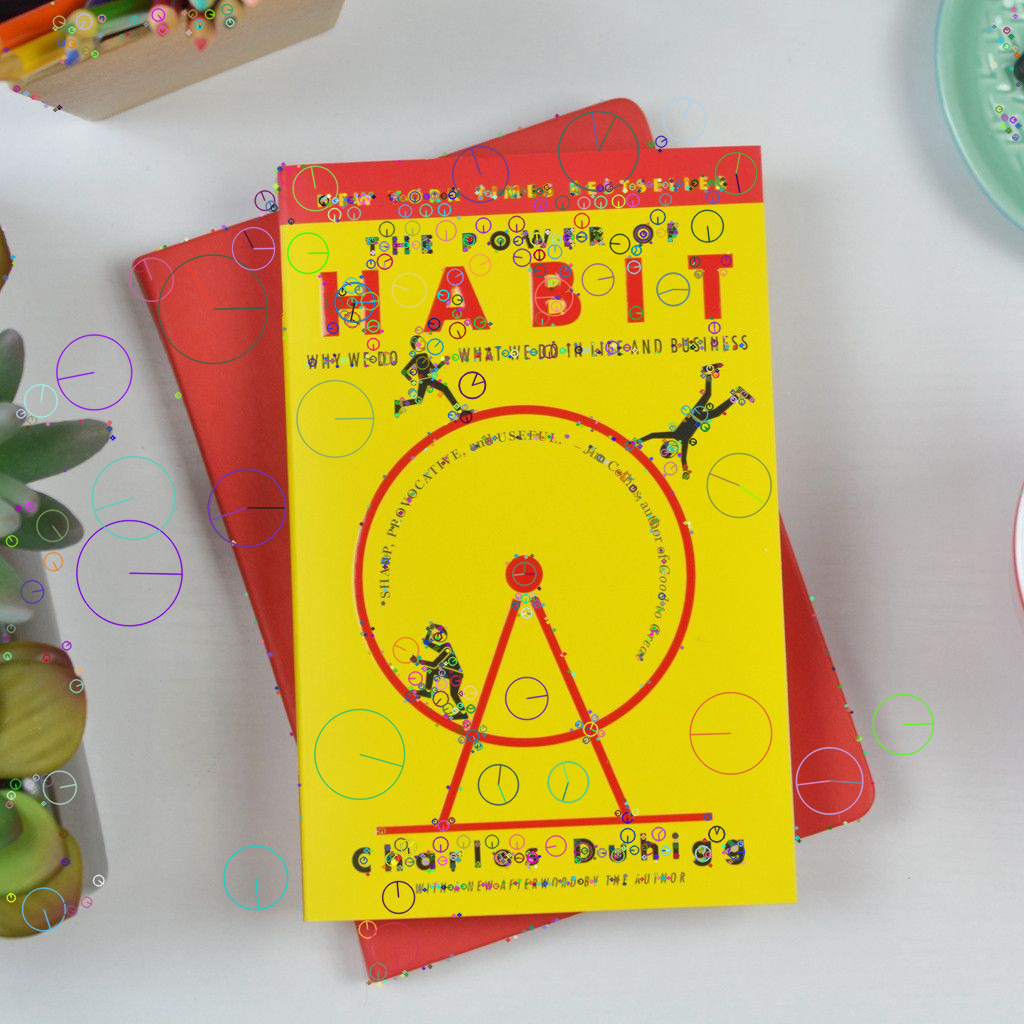

In [10]:
result1 = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result1)

In [11]:
# result2 = cv2.drawKeypoints(img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2_imshow(result2)

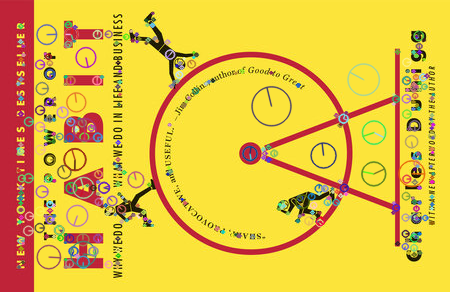

In [12]:
result2 = cv2.drawKeypoints(img2_rotation, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result2)

In [13]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)

In [14]:
# matches = sorted(matches, key=lambda x:x.distance)
# matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)

In [15]:
matches = sorted(matches, key=lambda x:x.distance)
matched_img = cv2.drawMatches(img1, keypoints1, img2_rotation, keypoints2, matches[:50], None, flags=2)

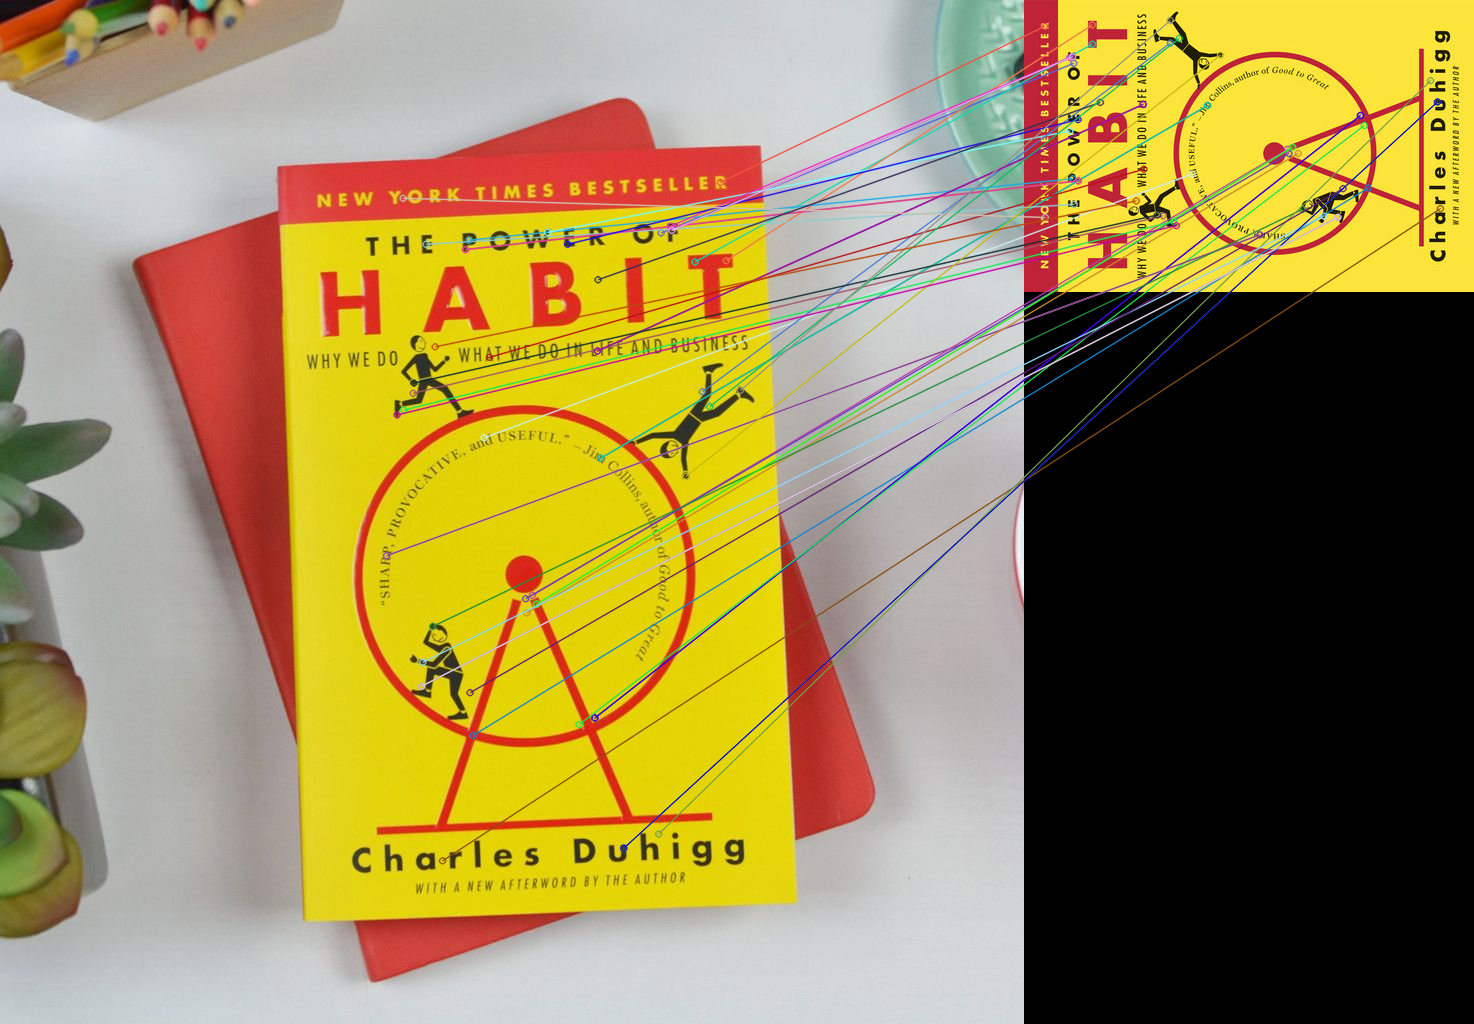

In [16]:
cv2_imshow(matched_img)

In [17]:
!jupyter nbconvert --to html "Lab07_SHIFT.ipynb"

[NbConvertApp] Converting notebook Lab07_SHIFT.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 4525044 bytes to Lab07_SHIFT.html
